## Esercitazione 7 -  9 Aprile 2024

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym
from sympy.utilities.lambdify import lambdify

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

## Esercizio 2
Implementare il metodo di Newton Raphson per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

In [ ]:
def NewtonMin(fgrad, Hess, x0, tolx, tolf, nmax):
    matHess = Hess(x0)
    if np.linalg.det(matHess) == 0:
        # la matrice non è a rango max
        return None, None, None

    grad_fx0 = fgrad(x0)
    s = -npl.solve(matHess, fgrad(x0))

    it = 1
    x1 = x0 + s
    grad_fx1 = fgrad(x1)
    vxk = [npl.norm(s, 1)]

    while (
        it <= nmax and
        npl.norm(grad_fx1, 1) >= tolf and
        npl.norm(s, 1) >= tolx * npl.norm(x1, 1)
    ):
        x0 = x1
        it += 1
        matHess = Hess(x0)
        grad_fx0 = grad_fx1

        if npl.det(matHess) == 0:
            # la matrice non è a rango max
            return None, None, None

        s = -np.linalg.solve(matHess, grad_fx0)
        x1 = x0 + s
        grad_fx1 = fgrad(x1)
        vxk.append(np.linalg.norm(s, 1))
    return x1, it, vxk


Calcolare il punto di minimo delle seguenti due funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x^2 - y^2)^2 + (x - 1)^2$$
   $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y)$$

[1. 1.] 5


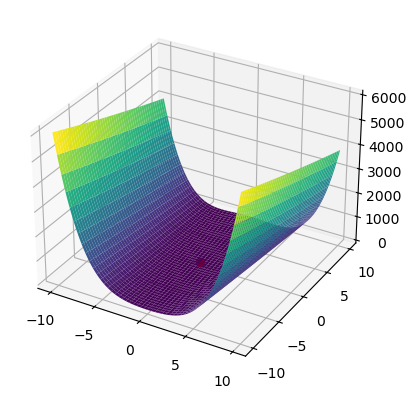

In [41]:
f = lambda x: 0.5 * (0.001 * (x[0] - 1) ** 2 + (x[0] ** 2 - x[1]) ** 2)
grad = lambda x: np.array(
    [2 * x[0] ** 3 - 2 * x[0] * x[1] + 0.001 * x[0] - 0.001, -x[0] ** 2 + x[1]]
)
Hess = lambda x: np.array(
    [[6 * x[0] ** 2 - 2 * x[1] + 0.001, -2 * x[0]], [-2 * x[0], 1]]
)

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)

Z = 0.5 * (0.001 * (X - 1) ** 2 + (X**2 - Y) ** 2)

x0 = np.array([-10, 5])
tolx = 1e-10
tolf = 1.e-10
nmax = 100

xn, itn, vxn = NewtonMin(grad, Hess, x0, tolx, tolf, nmax)
print(xn, itn)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.plot(0.0, 0.0, f(np.array(xn)), "ro")

[ 1. -1.] 28


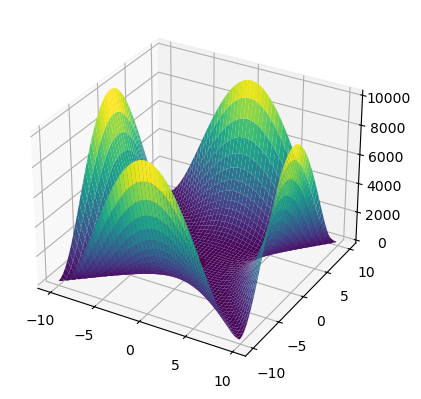

In [44]:
f = lambda x: (x[0] ** 2 - x[1] ** 2) ** 2 + (x[0] - 1) ** 2
grad = lambda x: np.array(
    [
        4 * x[0] * (x[0] ** 2 - x[1] ** 2) + 2 * x[0] - 2,
        -4 * x[1] * (x[0] ** 2 - x[1] ** 2),
    ]
)
Hess = lambda x: np.array(
    [
        [12 * x[0] ** 2 - 4 * x[1] ** 2 + 2, -8 * x[0] * x[1]],
        [-8 * x[0] * x[1], -4 * x[0] ** 2 + 12 * x[1] ** 2],
    ]
)

x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = (X**2 - Y**2) ** 2 + (X - 1) ** 2

x0 = np.array([-10, 5])
xn, itn, vxn = NewtonMin(grad, Hess, x0, tolx, tolf, nmax) 
print(xn, itn)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.plot(0.0, 0.0, f(np.array(xn)), "ro")

Per la terza funzione test $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y),$$ calcolo gradiente e derivate parziali usando le funzioni sumboliche di sympy.

Si tratta di una funzione non convessa, l'iterato iniziale di permettera di raggiungere uno dei minimi locali

In [2]:
x=sym.symbols('x[0]')
y=sym.symbols('x[1]')
f=sym.sin(x**2/4-y**2/4)*sym.cos(2*x-y)
f_num=lambdify((x,y),f,np)

In [ ]:
dfdx=sym.diff(f,x,1)
print('dfdx',dfdx)
dfdy=sym.diff(f,y,1)
print('dfdy',dfdy)
d2fdx2=sym.diff(dfdx,x,1)
print('d2fdx2',d2fdx2)
d2fdxdy=sym.diff(dfdx,y,1)
print('d2fdx2',d2fdxdy)
d2fdy2=sym.diff(dfdy,y,1)
print('d2fdy2',d2fdy2)
gradiente= np.array([lambdify((x,y),dfdx,np),lambdify((x,y),dfdy,np)])
Hess = np.array([[lambdify((x,y),d2fdx2,np),lambdify((x,y),d2fdxdy,np)],[lambdify((x,y),d2fdxdy,np),lambdify((x,y),d2fdy2,np)]])

x0=np.array([-4.0,4.0])

## Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.



## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg